### Modeling Bureau Data

Step 5: We've modeled and reduced the original application data down to about 40 fields that produce meaningful signals, but our prediction results are pretty abysmal.  We've added in data from the credit bureaus, which will hopefully improve our prediction performance.

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import visuals as vs

from IPython.display import display # A
#allows the use of display() for DataFrames
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier

# Pretty display for notebooks
%matplotlib inline

# Show all of the data in a dataframe
pd.set_option('display.max_columns', None)

### Load Data

In [2]:
# Training Set
application_train = pd.read_csv('data/tmp/bureau_train_preprocessed_imputation_most_frequent_standard_scaler_outliers_replaced_no_log.csv', index_col=0)
application_test = pd.read_csv('data/tmp/bureau_test_preprocessed_imputation_most_frequent_standard_scaler_outliers_replaced_no_log.csv', index_col=0)

In [3]:
display(application_train.head())
display(application_test.head())

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,APARTMENTS_AVG,APARTMENTS_MEDI,APARTMENTS_MODE,BASEMENTAREA_AVG,BASEMENTAREA_MEDI,BASEMENTAREA_MODE,BOOL_FLAG_EMAIL,BOOL_FLAG_EMP_PHONE,BOOL_FLAG_OWN_CAR,BOOL_FLAG_OWN_REALTY,BOOL_FLAG_PHONE,BOOL_FLAG_WORK_PHONE,CNT_CHILDREN,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,COMMONAREA_AVG,COMMONAREA_MEDI,COMMONAREA_MODE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,ELEVATORS_AVG,ELEVATORS_MEDI,ELEVATORS_MODE,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,ENTRANCES_AVG,ENTRANCES_MEDI,ENTRANCES_MODE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_CONT_MOBILE,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_2,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_MOBIL,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE,FLOORSMIN_AVG,FLOORSMIN_MEDI,FLOORSMIN_MODE,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUR_APPR_PROCESS_START_0,HOUR_APPR_PROCESS_START_1,HOUR_APPR_PROCESS_START_10,HOUR_APPR_PROCESS_START_11,HOUR_APPR_PROCESS_START_12,HOUR_APPR_PROCESS_START_13,HOUR_APPR_PROCESS_START_14,HOUR_APPR_PROCESS_START_15,HOUR_APPR_PROCESS_START_16,HOUR_APPR_PROCESS_START_17,HOUR_APPR_PROCESS_START_18,HOUR_APPR_PROCESS_START_19,HOUR_APPR_PROCESS_START_2,HOUR_APPR_PROCESS_START_20,HOUR_APPR_PROCESS_START_21,HOUR_APPR_PROCESS_START_22,HOUR_APPR_PROCESS_START_23,HOUR_APPR_PROCESS_START_3,HOUR_APPR_PROCESS_START_4,HOUR_APPR_PROCESS_START_5,HOUR_APPR_PROCESS_START_6,HOUR_APPR_PROCESS_START_7,HOUR_APPR_PROCESS_START_8,HOUR_APPR_PROCESS_START_9,HOUSETYPE_MODE_not specified,HOUSETYPE_MODE_org spec account,HOUSETYPE_MODE_reg oper account,HOUSETYPE_MODE_reg oper spec account,LANDAREA_AVG,LANDAREA_MEDI,LANDAREA_MODE,LIVE_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_MODE,LIVINGAREA_AVG,LIVINGAREA_MEDI,LIVINGAREA_MODE,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_AVG,NONLIVINGAREA_MEDI,NONLIVINGAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUP

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,APARTMENTS_AVG,APARTMENTS_MEDI,APARTMENTS_MODE,BASEMENTAREA_AVG,BASEMENTAREA_MEDI,BASEMENTAREA_MODE,BOOL_FLAG_EMAIL,BOOL_FLAG_EMP_PHONE,BOOL_FLAG_OWN_CAR,BOOL_FLAG_OWN_REALTY,BOOL_FLAG_PHONE,BOOL_FLAG_WORK_PHONE,CNT_CHILDREN,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,COMMONAREA_AVG,COMMONAREA_MEDI,COMMONAREA_MODE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,ELEVATORS_AVG,ELEVATORS_MEDI,ELEVATORS_MODE,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,ENTRANCES_AVG,ENTRANCES_MEDI,ENTRANCES_MODE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_CONT_MOBILE,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_2,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_MOBIL,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE,FLOORSMIN_AVG,FLOORSMIN_MEDI,FLOORSMIN_MODE,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUR_APPR_PROCESS_START_0,HOUR_APPR_PROCESS_START_1,HOUR_APPR_PROCESS_START_10,HOUR_APPR_PROCESS_START_11,HOUR_APPR_PROCESS_START_12,HOUR_APPR_PROCESS_START_13,HOUR_APPR_PROCESS_START_14,HOUR_APPR_PROCESS_START_15,HOUR_APPR_PROCESS_START_16,HOUR_APPR_PROCESS_START_17,HOUR_APPR_PROCESS_START_18,HOUR_APPR_PROCESS_START_19,HOUR_APPR_PROCESS_START_2,HOUR_APPR_PROCESS_START_20,HOUR_APPR_PROCESS_START_21,HOUR_APPR_PROCESS_START_22,HOUR_APPR_PROCESS_START_23,HOUR_APPR_PROCESS_START_3,HOUR_APPR_PROCESS_START_4,HOUR_APPR_PROCESS_START_5,HOUR_APPR_PROCESS_START_6,HOUR_APPR_PROCESS_START_7,HOUR_APPR_PROCESS_START_8,HOUR_APPR_PROCESS_START_9,HOUSETYPE_MODE_not specified,HOUSETYPE_MODE_org spec account,HOUSETYPE_MODE_reg oper account,HOUSETYPE_MODE_reg oper spec account,LANDAREA_AVG,LANDAREA_MEDI,LANDAREA_MODE,LIVE_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_MODE,LIVINGAREA_AVG,LIVINGAREA_MEDI,LIVINGAREA_MODE,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_AVG,NONLIVINGAREA_MEDI,NONLIVINGAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUP

In [4]:
application_train_SK_ID_CURR = application_train['SK_ID_CURR']
application_train_TARGET = application_train['TARGET']
application_train = application_train.drop('SK_ID_CURR',axis=1)
application_train = application_train.drop('TARGET', axis=1)
print("Loaded Training Set: {0} rows {1} cols".format(application_train.shape[0], application_train.shape[1]))

application_test_SK_ID_CURR = application_test['SK_ID_CURR']
application_test = application_test.drop('SK_ID_CURR',axis=1)
print("Loaded Training Set: {0} rows {1} cols".format(application_test.shape[0], application_train.shape[1]))

Loaded Training Set: 307511 rows 318 cols
Loaded Training Set: 48744 rows 318 cols


In [5]:
def get_prediction_performance(dataFrame, target=None): 
    
    df = dataFrame.copy()
    
    # https://stackoverflow.com/questions/24870306/how-to-check-if-a-column-exists-in-pandas 
    if 'TARGET' in df: 
        target = df['TARGET']
        df = df.drop('TARGET',axis=1)

    if 'SK_ID_CURR' in df: 
        df = df.drop('SK_ID_CURR', axis=1)
    
    # Make a test and train set
    X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

    dtc = DecisionTreeClassifier(criterion='entropy', max_depth=1, max_features='auto', random_state=42)
    clf = AdaBoostClassifier(base_estimator=dtc, algorithm='SAMME.R', n_estimators = 500, random_state=42)
    clf.fit(X_train, y_train) 
    
    predictions = clf.predict(X_test)
    score = roc_auc_score(y_test, predictions)
    
    return score    

### Check Model Prediction Performance

In [6]:
score = get_prediction_performance(application_train, application_train_TARGET)
print("Prediction Score (ROC AUC): {0}".format(score))

Prediction Score (ROC AUC): 0.5161596689529163


### Feature Importance

In [7]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=1, max_features='auto', random_state=42)
clf = AdaBoostClassifier(base_estimator=dtc, algorithm='SAMME.R', n_estimators = 500, random_state=42)
clf.fit(application_train, application_train_TARGET)

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

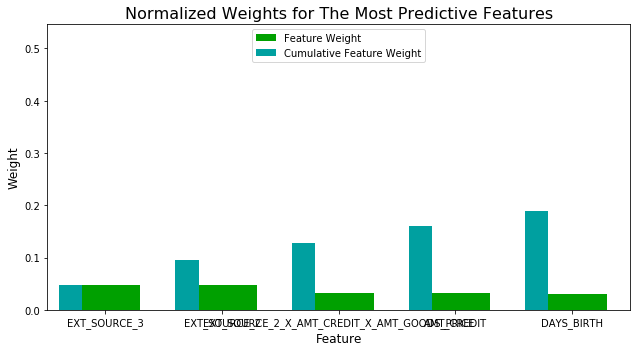

[('EXT_SOURCE_3', 0.048),
 ('EXT_SOURCE_2', 0.048),
 ('EXT_SOURCE_2_X_AMT_CREDIT_X_AMT_GOODS_PRICE', 0.032),
 ('AMT_CREDIT', 0.032),
 ('DAYS_BIRTH', 0.03),
 ('EXT_SOURCE_1', 0.03),
 ('AMT_ANNUITY', 0.028),
 ('AMT_CREDIT_X_AMT_ANNUITY', 0.026),
 ('DAYS_EMPLOYED', 0.026),
 ('EXT_SOURCE_2_X_AMT_GOODS_PRICE_X_AMT_ANNUITY', 0.026),
 ('AMT_GOODS_PRICE', 0.024),
 ('SUM_AMT_CREDIT_SUM_DEBT', 0.022),
 ('DAYS_ID_PUBLISH', 0.02),
 ('PER_GOODS_CREDIT', 0.02),
 ('EXT_SOURCE_3_X_AMT_GOODS_PRICE', 0.02),
 ('MED_DAYS_CREDIT', 0.018),
 ('DAYS_REGISTRATION', 0.018),
 ('PER_ANNUITY_INCOME', 0.018),
 ('TOTALAREA_MODE', 0.018),
 ('PER_CREDIT_INCOME', 0.016)]

In [8]:
# Plot
vs.feature_plot(importances, application_train, application_train_TARGET)

display(list(zip(application_train.columns.values[indices[:20]], importances[indices[:20]])))

### Correlations

Just sanity-checking that the features with high correlations to the TARGET value show up in the Feature Importance ranking from AdaBoost

In [9]:
application_train_w_target = application_train.copy()
application_train_w_target['TARGET'] = application_train_TARGET
correlations = application_train_w_target.corr()['TARGET'].sort_values()

In [10]:
print("Top 10 Negative Correlations\n{0}\n".format(correlations.head(n=20)))
print("Top 10 Positive Correlations\n{0}\n".format(correlations.tail(n=20)))

Top 10 Negative Correlations
EXT_SOURCE_2                                   -0.160303
EXT_SOURCE_3                                   -0.157397
EXT_SOURCE_1                                   -0.099152
EXT_SOURCE_2_X_AMT_CREDIT_X_AMT_GOODS_PRICE    -0.085807
EXT_SOURCE_2_X_AMT_GOODS_PRICE_X_AMT_ANNUITY   -0.079273
DAYS_BIRTH                                     -0.078239
DAYS_EMPLOYED                                  -0.057159
NAME_EDUCATION_TYPE_Higher education           -0.056593
DAYS_LAST_PHONE_CHANGE                         -0.055006
CODE_GENDER_F                                  -0.054704
DAYS_ID_PUBLISH                                -0.051457
NAME_INCOME_TYPE_Pensioner                     -0.046209
ORGANIZATION_TYPE_XNA                          -0.045987
EMERGENCYSTATE_MODE_No                         -0.042201
DAYS_REGISTRATION                              -0.041421
REGION_POPULATION_RELATIVE                     -0.037227
WALLSMATERIAL_MODE_Panel                       -0.033119
AM

In [16]:
# Grab the feature names of the 10 most and least correlated features
hc_features = correlations.index
highly_correlated = list(hc_features[:10])
highly_correlated.extend(list(hc_features[10:17]))

df_hc = application_train[highly_correlated]
#df_hc = df_hc.drop('TARGET',axis=1)

In [17]:
hc_corr = df_hc.corr()

#### Correlation Heatmap

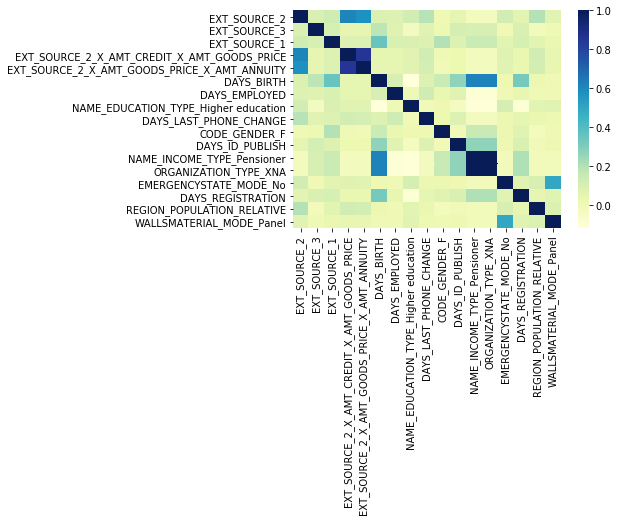

In [18]:
ax = sns.heatmap(hc_corr, cmap="YlGnBu")

In [19]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=1, max_features='auto', random_state=42)
clf = AdaBoostClassifier(base_estimator=dtc, algorithm='SAMME.R', n_estimators = 500, random_state=42)
clf.fit(application_train, application_train_TARGET)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
          learning_rate=1.0, n_estimators=500, random_state=42)

In [20]:
predictions = clf.predict(application_test)

In [21]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
        
# https://stackoverflow.com/questions/209840/convert-two-lists-into-a-dictionary-in-python
features = dict(zip(application_train.columns.values[indices], importances[indices]))

display(features)

# Let's just look at everything with an importance >= 0.01
important_features = application_train.columns.values[indices][:22]

{'EXT_SOURCE_3': 0.048,
 'EXT_SOURCE_2': 0.048,
 'EXT_SOURCE_2_X_AMT_CREDIT_X_AMT_GOODS_PRICE': 0.032,
 'AMT_CREDIT': 0.032,
 'DAYS_BIRTH': 0.03,
 'EXT_SOURCE_1': 0.03,
 'AMT_ANNUITY': 0.028,
 'AMT_CREDIT_X_AMT_ANNUITY': 0.026,
 'DAYS_EMPLOYED': 0.026,
 'EXT_SOURCE_2_X_AMT_GOODS_PRICE_X_AMT_ANNUITY': 0.026,
 'AMT_GOODS_PRICE': 0.024,
 'SUM_AMT_CREDIT_SUM_DEBT': 0.022,
 'DAYS_ID_PUBLISH': 0.02,
 'PER_GOODS_CREDIT': 0.02,
 'EXT_SOURCE_3_X_AMT_GOODS_PRICE': 0.02,
 'MED_DAYS_CREDIT': 0.018,
 'DAYS_REGISTRATION': 0.018,
 'PER_ANNUITY_INCOME': 0.018,
 'TOTALAREA_MODE': 0.018,
 'PER_CREDIT_INCOME': 0.016,
 'AMT_ANNUITY_X_EXT_SOURCE_1': 0.016,
 'DAYS_LAST_PHONE_CHANGE': 0.014,
 'REGION_POPULATION_RELATIVE': 0.012,
 'LIVINGAREA_AVG': 0.01,
 'SUM_AMT_CREDIT_SUM_LIMIT': 0.008,
 'LIVINGAREA_MODE': 0.008,
 'AMT_REQ_CREDIT_BUREAU_QRT': 0.008,
 'AMT_REQ_CREDIT_BUREAU_DAY': 0.008,
 'SUM_STATUS_1': 0.008,
 'SUM_STATUS_C': 0.008,
 'REGION_RATING_CLIENT': 0.008,
 'OCCUPATION_TYPE_Sales staff': 0.006,
 'Y

#### Make Kaggle Submission

In [22]:
d = {'SK_ID_CURR': application_test_SK_ID_CURR, 'TARGET': predictions}
sub = pd.DataFrame(data=d)

print("Number of records flagged {0}".format(np.sum(sub['TARGET'])))

sub.to_csv('data/tmp/submission_bureau_reduced.csv', index=False)

Number of records flagged 107


#### Kaggle Score: 
- Full Dataset with Bureau Data: 0.511 - Total records flagged: 383
- Reduced Dataset with Bureau Data: - Total records flagged: 446
- Full Dataset, Outliers Removed, With Bureau Data: 
- Reduced Dataset, Outliers Removed, with Bureau Data: 
